<a href="https://colab.research.google.com/github/umleeho1/coputervison/blob/main/Chapter4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 코드 4-1
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# 코드 4-2
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
# 코드 4-3
mlp_model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
# 코드 4-4
mlp_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# 코드 4-5
# 원핫인코딩을 적용하고 샆운 경우
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

mlp_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# 코드 4-6
mlp_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 코드 4-7
mlp_model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2556 - accuracy: 0.9275
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1143 - accuracy: 0.9668
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0774 - accuracy: 0.9767
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0594 - accuracy: 0.9818
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0455 - accuracy: 0.9857


In [ ]:
# 코드 4-8
mlp_model.evaluate(x_test, y_test, verbose=2)

313/313 - 0s - loss: 0.0841 - accuracy: 0.9757


[0.08409647643566132, 0.9757000207901001]

In [ ]:
# 코드 4-9
inputs = tf.keras.Input(shape=(28,28))

x = tf.keras.layers.Flatten()(inputs)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(10, activation='softmax')(x)

mlp_model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
# 코드 4-10
class MLP_Model(tf.keras.Model):
  def __init__(self):
    super(MLP_Model, self).__init__()
    self.flatten = tf.keras.layers.Flatten()
    self.dense = tf.keras.layers.Dense(128, activation='relu')
    self.softmax = tf.keras.layers.Dense(10, activation='softmax')
  
  def call(self, inputs):
    x = self.flatten(inputs)
    x = self.dense(x)
    return self.softmax(x)


mlp_model = MLP_Model()

In [ ]:
# 코드 4-11
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((-1, 28, 28, 1))
test_images = test_images.reshape((-1, 28, 28, 1))

# 픽셀 값을 0~1 사이로 정규화합니다.
train_images, test_images = train_images / 255.0, test_images / 255.0

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))

model.summary()

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.summary()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

(60000, 28, 28)
(10000, 28, 28)
(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 28, 28)
(10000, 28, 28)
(60000, 28, 28, 1)
(10000, 28, 28, 1)
Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_20 (Flatten)         (None, 576)     

ValueError: ignored

In [ ]:
# 코드 4-13
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((-1, 28, 28, 1))
test_images = test_images.reshape((-1, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

resized_x_train = tf.image.resize(train_images, [32, 32])
resized_x_test = tf.image.resize(test_images, [32, 32])

resnet_model = tf.keras.applications.ResNet50V2(
    input_shape=(32,32,1),
    classes=10,
    weights=None
)
resnet_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
resnet_model.fit(resized_x_train, train_labels, epochs=5)
resnet_model.evaluate(resized_x_test, test_labels, verbose=2)

Epoch 1/5
 309/1875 [===>..........................] - ETA: 50:46 - loss: 0.5247 - accuracy: 0.8504

KeyboardInterrupt: ignored

In [ ]:
#코드 4-14
from PIL import Image
import os
import numpy as np

!mkdir "./images"
!wget -O ./images/image1.png https://static.turbosquid.com/Preview/2019/08/01__08_55_55/Samsung_Notebook7_2019_13inch_00.jpgA0E07B83-D533-4243-A5AB-9E9394E895D7Large.jpg
!wget -O ./images/image2.png https://upload.wikimedia.org/wikipedia/commons/1/18/Freightliner_truck_in_Vietnam.JPG
!wget -O ./images/image3.png https://cf.ltkcdn.net/kids/images/orig/239664-1604x988-snail.jpg
!wget -O ./images/image4.png https://upload.wikimedia.org/wikipedia/commons/7/7b/Orange-Whole-%26-Split.jpg
!wget -O ./images/image5.png https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/bojnice-castle-1603142898.jpg?crop=1.00xw:0.752xh;0,0.0240xh&resize=640:*

data_dir = "./images/"
files = os.listdir(data_dir)

images = []
for file in files:
  path = os.path.join(data_dir, file)
  images.append(np.array(Image.open(path)))


mkdir: cannot create directory ‘./images’: File exists
--2021-10-17 04:30:35--  https://static.turbosquid.com/Preview/2019/08/01__08_55_55/Samsung_Notebook7_2019_13inch_00.jpgA0E07B83-D533-4243-A5AB-9E9394E895D7Large.jpg
Resolving static.turbosquid.com (static.turbosquid.com)... 99.84.102.94, 99.84.102.16, 99.84.102.42, ...
Connecting to static.turbosquid.com (static.turbosquid.com)|99.84.102.94|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44488 (43K) [image/jpeg]
Saving to: ‘./images/image1.png’

./images/image1.png 100%[===================>]  43.45K  --.-KB/s    in 0.001s  

2021-10-17 04:30:35 (40.3 MB/s) - ‘./images/image1.png’ saved [44488/44488]

--2021-10-17 04:30:36--  https://upload.wikimedia.org/wikipedia/commons/1/18/Freightliner_truck_in_Vietnam.JPG
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request 

In [ ]:
#코드 4-15
import tensorflow as tf

resized_images = np.array(np.zeros((len(images), 224, 224, 3)))
for i in range(len(images)):
  resized_images[i] = tf.image.resize(images[i], [224, 224])
  
preprocessed_images = tf.keras.applications.mobilenet_v2.preprocess_input(resized_images)

In [ ]:
#코드 4-16
mobilenet_imagenet_model = tf.keras.applications.MobileNetV2(weights="imagenet")
y_pred = mobilenet_imagenet_model.predict(preprocessed_images)
topK = 1
y_pred_top = tf.keras.applications.mobilenet_v2.decode_predictions(y_pred, top = topK)

49152/35363 [=========================================] - 0s 0us/step


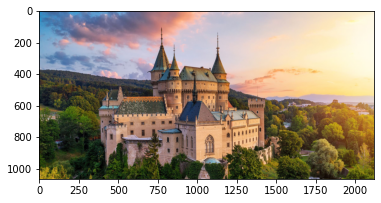

castle (90.2%


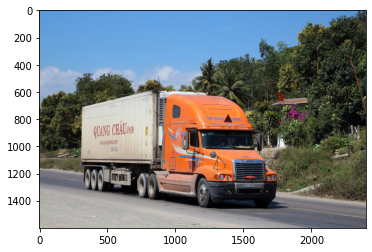

trailer_truck (62.2%


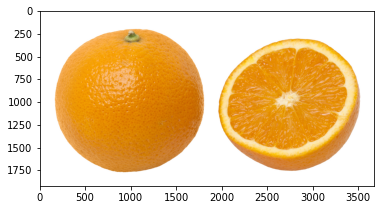

orange (92.1%


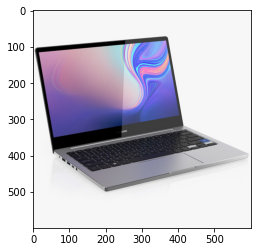

notebook (82.4%


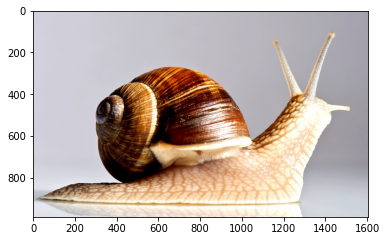

snail (99.2%


In [ ]:
#코드 4-17
from matplotlib import pyplot as plt
import numpy as np

for i in range(len(images)):
  plt.imshow(images[i])
  plt.show()

  for k in range(topK):
    print(f'{y_pred_top[i][k][1]} ({round(y_pred_top[i][k][2] * 100, 1)}%')

In [ ]:
# 코드 4-18
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

raw_train, raw_test = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[20%:]'],
    as_supervised=True
)

Shuffling and writing examples to /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incompleteI1DP1A/cats_vs_dogs-train.tfrecord
Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


In [ ]:
# 코드 4-19
import numpy as np
import tensorflow as tf
from tensorflow.image import ResizeMethod

def preprocess(image, label):
  out_image = tf.image.resize(image, [224,224], method=ResizeMethod.BICUBIC)
  out_image = tf.keras.applications.mobilenet_v2.preprocess_input(out_image)
  return out_image, label

batch_size = 32
train_batch = raw_train.map(preprocess).batch(batch_size)
test_batch = raw_test.map(preprocess).batch(batch_size)

In [ ]:
# 코드 4-20
mobilenet_base = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    weights="imagenet",
    include_top=False
)

In [ ]:
# 코드 4-21
mobilenet_base.trainable = False

mobilenet_model = tf.keras.Sequential()
mobilenet_model.add(mobilenet_base)
mobilenet_model.add(tf.keras.layers.GlobalAveragePooling2D())
mobilenet_model.add(tf.keras.layers.Dense(1))
mobilenet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
mobilenet_model.fit(train_batch, epochs=5)
mobilenet_model.evaluate(test_batch,verbose=2)

Epoch 1/5
582/582 [==============================] - 446s 760ms/step - loss: 0.3134 - accuracy: 0.9627
Epoch 2/5
164/582 [=======>......................] - ETA: 5:18 - loss: 0.2701 - accuracy: 0.9756

KeyboardInterrupt: ignored

In [ ]:
# 코드 4-22
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

raw_train, raw_test = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[20%:]'],
    as_supervised=True
)

In [ ]:
# 코드 4-23
import numpy as np
import tensorflow as tf

def preprocess(image, label):
  out_image = tf.image.resize(image/255, [224,224])
  return out_image, label

batch_size = 32
train_batch = raw_train.map(preprocess).batch(batch_size)
test_batch = raw_test.map(preprocess).batch(batch_size)

In [ ]:
# 코드 4-25
import tensorflow_hub as hub

url = "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/5"

hub_model_transfer = tf.keras.Sequential([
  hub.KerasLayer(url, input_shape=[224,224,3], trainable=False),
  tf.keras.layers.Dense(1)
])

In [ ]:
# 코드 4-26
hub_model_transfer.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hub_model_transfer.fit(train_batch, epochs=5)

Epoch 1/5
100/582 [====>.........................] - ETA: 5:47 - loss: 7.5587 - accuracy: 0.5053

KeyboardInterrupt: ignored

In [ ]:
# 코드 4-27
hub_model_transfer.evaluate(test_batch, verbose=2)

KeyboardInterrupt: ignored

In [ ]:
# 코드 4-28
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

mlp_model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
mlp_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
mlp_model.fit(x_train, y_train, epochs=5)

11501568/11490434 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 7s 2ms/step - loss: 0.2633 - accuracy: 0.9251
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1158 - accuracy: 0.9665
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0798 - accuracy: 0.9760
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0595 - accuracy: 0.9821
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0460 - accuracy: 0.9858


In [ ]:
# 코드 4-29
converter = tf.lite.TFLiteConverter.from_keras_model(mlp_model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmpuzi4_1ak/assets


In [ ]:
# 코드 4-30
with open('./keras_model.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
# 코드 4-31
tf.saved_model.save(mlp_model, "./mlp_model/")
# 또는
mlp_model.save("./mlp_model/")

INFO:tensorflow:Assets written to: ./mlp_model/assets


INFO:tensorflow:Assets written to: ./mlp_model/assets


INFO:tensorflow:Assets written to: ./mlp_model/assets


INFO:tensorflow:Assets written to: ./mlp_model/assets


In [ ]:
# 코드 4-32
mlp_model.save("./mlp_model.h5")

In [ ]:
# 코드 4-33
# SavedModel을 케라스 모델로 불러오기
saved_model = tf.keras.models.load_model("./mlp_model/")
# 코드 4-34
# HDF5로 저장된 모델을 케라스 모델로 불러오기
h5_model = tf.keras.models.load_model("./mlp_model.h5")

In [ ]:
# 코드 4-35
converter = tf.lite.TFLiteConverter.from_saved_model("./mlp_model/")
tflite_model = converter.convert()

In [ ]:
# 코드 4-36
with open('./saved_model.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
# 코드 4-37
class Inc(tf.keras.layers.Layer):
  def call(self, inputs):
    return inputs + 1
inc = Inc()

In [ ]:
# 코드 4-38
class Inc_Graph(tf.keras.layers.Layer):
  @tf.function
  def call(self, inputs):
    return inputs + 1
inc_g = Inc_Graph()

In [ ]:
# 코드 4-39
inc_g2 = tf.function(inc)

In [ ]:
# 코드 4-40
print(inc_g(tf.constant(3)))
print(inc_g(tf.constant([3,2])))
print(inc_g(tf.constant([[3,2],[1.0,5.0]])))

print(inc_g2(tf.constant(3)))
print(inc_g2(tf.constant([3,2])))
print(inc_g2(tf.constant([[3,2],[1.0,5.0]])))

tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor([4 3], shape=(2,), dtype=int32)
tf.Tensor(
[[4. 3.]
 [2. 6.]], shape=(2, 2), dtype=float32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor([4 3], shape=(2,), dtype=int32)
tf.Tensor(
[[4. 3.]
 [2. 6.]], shape=(2, 2), dtype=float32)


In [ ]:
# 코드 4-41
print(inc_g(tf.constant(4)))
print(inc_g2(tf.constant(4)))

tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)


In [ ]:
# 코드 4-42
concrete_fun = inc_g.call.get_concrete_function(tf.TensorSpec(shape=(1,3), dtype=tf.float32))
print(concrete_fun(tf.constant([[1.0,2.0,3.0]])))

tf.Tensor([[2. 3. 4.]], shape=(1, 3), dtype=float32)


In [ ]:
# 코드 4-43
concrete_fun = inc_g2.get_concrete_function(tf.TensorSpec(shape=(1,3), dtype=tf.float32))
print(concrete_fun(tf.constant([[1.0,2.0,3.0]])))

tf.Tensor([[2. 3. 4.]], shape=(1, 3), dtype=float32)


In [ ]:
# 코드 4-44
mlp_model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),                                      
  tf.keras.layers.Dense(128, activation='relu'),                                   
  tf.keras.layers.Dense(10, activation='softmax')                                             
])

graph_model = tf.function(mlp_model)
concrete_func = graph_model.get_concrete_function(tf.TensorSpec(shape=mlp_model.inputs[0].shape, dtype=mlp_model.inputs[0].dtype))

In [ ]:
# 코드 4-45
class MLP_Model(tf.keras.Model):
  def __init__(self):
    super(MLP_Model, self).__init__()
    self.flatten = tf.keras.layers.Flatten()
    self.dense = tf.keras.layers.Dense(128, activation='relu')
    self.softmax = tf.keras.layers.Dense(10, activation='softmax')
  
  @tf.function
  def call(self, inputs):
    x = self.flatten(inputs)
    x = self.dense(x)
    return self.softmax(x)

mlp_model = MLP_Model()
concrete_func = mlp_model.call.get_concrete_function(
    tf.TensorSpec(shape=(None, 28, 28), dtype=tf.float32))

In [ ]:
# 코드 4-46
converter = tf.lite.TFLiteConverter.from_concrete_functions([concrete_func])
tflite_model = converter.convert()

with open('./concrete_cunc_model.tflite','wb') as f:
  f.write(tflite_model)

In [ ]:
# 합성곱 신경망 기반의 손글씨 분류 모델
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, xtest = x_train / 255.0, x_test / 255.0
x_train_4d = x_train.reshape(-1, 28, 28, 1)
x_test_4d = x_test.reshape(-1, 28, 28, 1)

cnn_model = tf.keras.models.Sequential([
 tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)),
 tf.keras.layers.MaxPooling2D((2,2)),
 tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
 tf.keras.layers.MaxPooling2D((2,2)),
 tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
 tf.keras.layers.Flatten(),
 tf.keras.layers.Dense(64, activation='relu'),
 tf.keras.layers.Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.fit(x_train_4d, y_train, epochs=5)

converter = tf.lite.TFLiteConverter.from_keras_model(cnn_model)
tflite_model =  converter.convert()

with open('./keras_model_cnn.tflite', 'wb') as f:
  f.write(tflite_model)

11501568/11490434 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 41s 6ms/step - loss: 0.1414 - accuracy: 0.9572
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0454 - accuracy: 0.9859
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0325 - accuracy: 0.9898
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0253 - accuracy: 0.9917
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0198 - accuracy: 0.9935
INFO:tensorflow:Assets written to: /tmp/tmpc6svwk77/assets


In [ ]:
# 이미지 분류에 사용할 모델
import tensorflow as tf

mobilenet_imagenet_model = tf.keras.applications.MobileNetV2(weights="imagenet")

converter = tf.lite.TFLiteConverter.from_keras_model(mobilenet_imagenet_model)
tflite_model = converter.convert()

with open('./mobilenet_imagenet_model.tflite','wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpdww976cd/assets


INFO:tensorflow:Assets written to: /tmp/tmpdww976cd/assets
/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)
